In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [2]:
!pip install wordcloud


In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/marenklan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marenklan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#Load csv review 
Reviews250 = pd.read_csv('data/sephora_reviews/reviews_0-250.csv')


/var/folders/tl/40517jl91c37d_b8j15w_1wm0000gn/T/ipykernel_11268/337343156.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Reviews250 = pd.read_csv('data/sephora_reviews/reviews_0-250.csv')


In [6]:
print(Reviews250.head())
print(Reviews250.info())
print(Reviews250.describe())

   Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0           0   1741593524       5             1.0          1.0   
1           1  31423088263       1             0.0          NaN   
2           2   5061282401       5             1.0          NaN   
3           3   6083038851       5             1.0          NaN   
4           4  47056667835       5             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                     2                         0                         2   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0                         0   
4                     0                         0                         0   

  submission_time                                        review_text  \
0      2023-02-01  I use this with the Nudestix “C

In [7]:
# missing values
missing_values = Reviews250.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              117486
helpfulness                 331832
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                    999
review_title                167011
skin_tone                   106056
eye_color                   138488
skin_type                    74683
hair_color                  141081
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64


In [9]:
Reviews250.shape


(602130, 19)

In [11]:
Reviews250['text_length'] = Reviews250['review_text'].apply(lambda x: len(x) if isinstance(x, str) else 0)


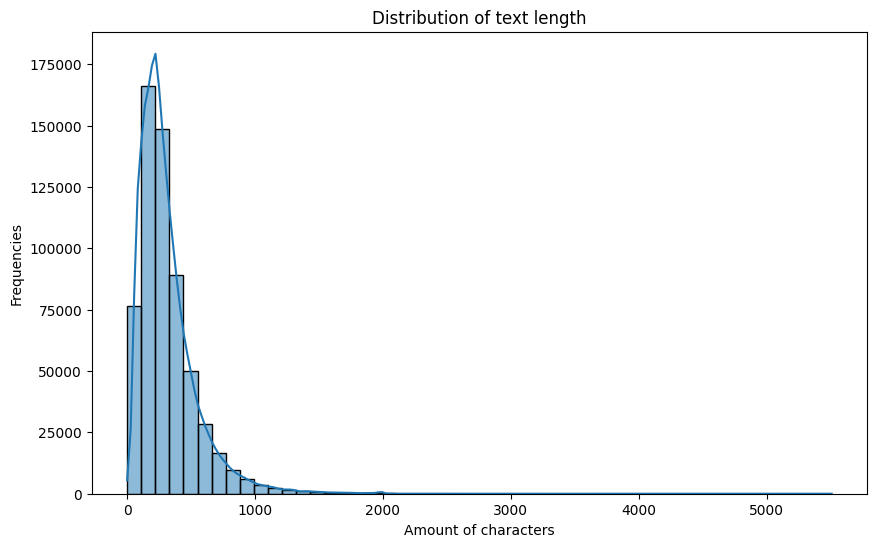

In [14]:
#length of text_reviews
plt.figure(figsize=(10, 6))
sns.histplot(Reviews250['text_length'], bins=50, kde=True)
plt.title('Distribution of text length')
plt.xlabel('Amount of characters')
plt.ylabel('Frequencies')
plt.show()

In [16]:

stop_words = set(stopwords.words('english'))
Reviews250['review_text'] = Reviews250['review_text'].astype(str)
Reviews250['tokenized'] = Reviews250['review_text'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])
Reviews250['filtered'] = Reviews250['tokenized'].apply(lambda x: [word.lower() for word in x if word.isalnum() and word.lower() not in stop_words])
all_words = [word for review in Reviews250['filtered'] for word in review]
freq_dist = FreqDist(all_words)

print(freq_dist.most_common(10))

[('skin', 708309), ('product', 358723), ('love', 227189), ('use', 216296), ('face', 196547), ('like', 191617), ('using', 159951), ('really', 153850), ('dry', 135976), ('great', 116757)]


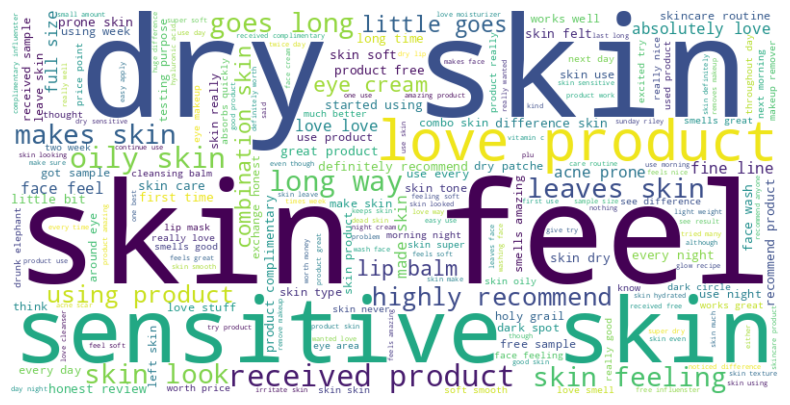

In [17]:
#wordcloud 
#Visualise common words using word clouds to get a quick visual overview of the most important terms in the reviews.
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
Reviews250.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd', 'text_length',
       'tokenized', 'filtered'],
      dtype='object')

In [19]:
Reviews250['is_recommended']

0         1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
602125    1.0
602126    1.0
602127    1.0
602128    1.0
602129    1.0
Name: is_recommended, Length: 602130, dtype: float64

/var/folders/tl/40517jl91c37d_b8j15w_1wm0000gn/T/ipykernel_11268/1720653967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=Reviews250, palette='viridis')


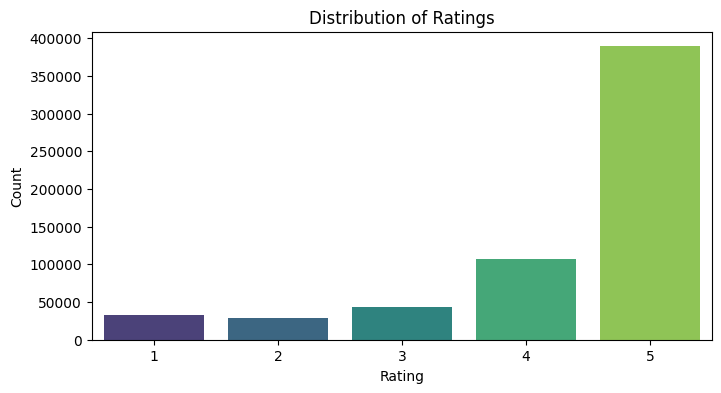

In [20]:
# Distribution of Ratings
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=Reviews250, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

/var/folders/tl/40517jl91c37d_b8j15w_1wm0000gn/T/ipykernel_11268/2411616765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_recommended', data=Reviews250, palette='viridis')


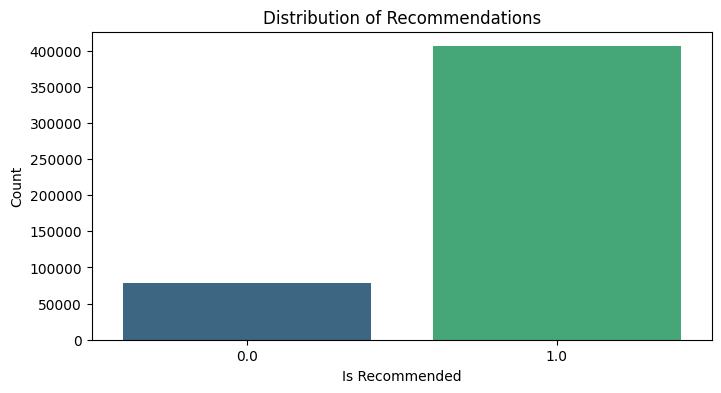

In [21]:
# Distribution of Recommendations
plt.figure(figsize=(8, 4))
sns.countplot(x='is_recommended', data=Reviews250, palette='viridis')
plt.title('Distribution of Recommendations')
plt.xlabel('Is Recommended')
plt.ylabel('Count')
plt.show()

/var/folders/tl/40517jl91c37d_b8j15w_1wm0000gn/T/ipykernel_11268/3935653029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='text_length', data=Reviews250, palette='viridis')


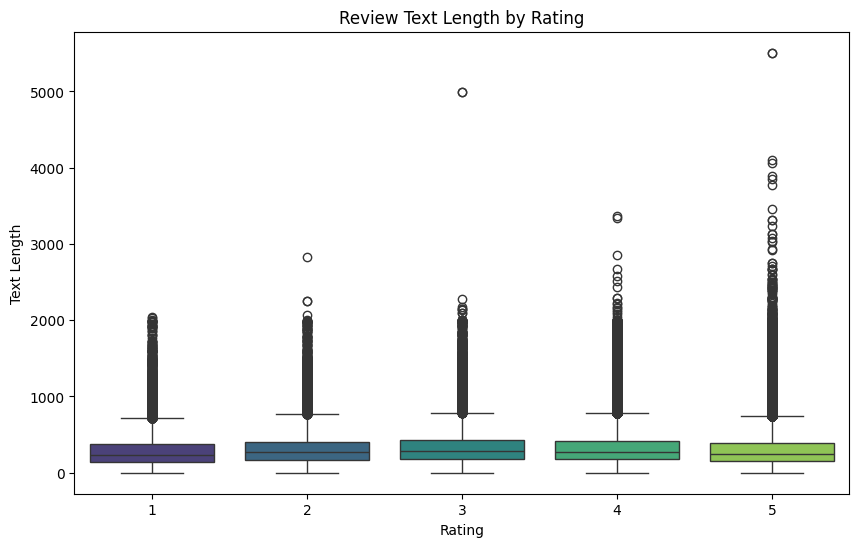

In [23]:
#Review Length vs. Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='text_length', data=Reviews250, palette='viridis')
plt.title('Review Text Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Text Length')
plt.show()

/var/folders/tl/40517jl91c37d_b8j15w_1wm0000gn/T/ipykernel_11268/4160492400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='skin_type', data=Reviews250, palette='viridis', order=Reviews250['skin_type'].value_counts().index)


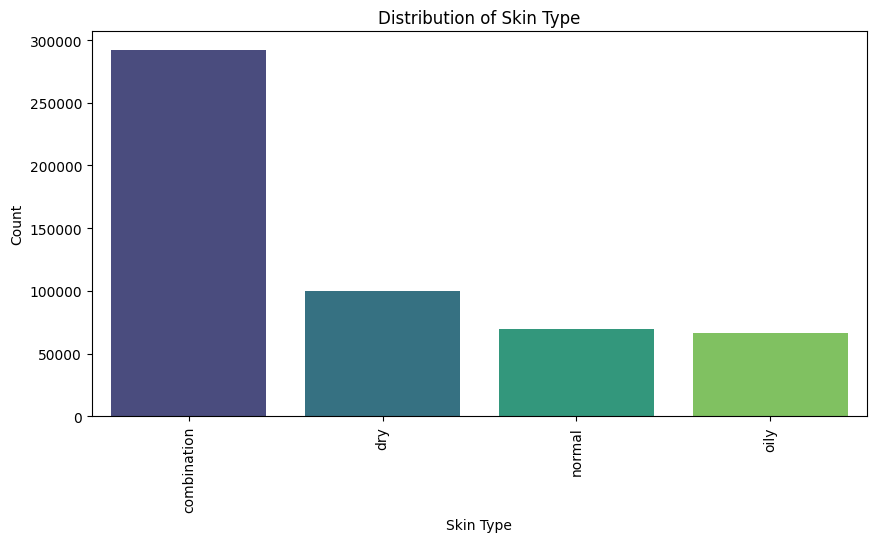

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(x='skin_type', data=Reviews250, palette='viridis', order=Reviews250['skin_type'].value_counts().index)
plt.title('Distribution of Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/var/folders/tl/40517jl91c37d_b8j15w_1wm0000gn/T/ipykernel_11268/3791233527.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_usd', y='product_name', data=df_top_products, palette='viridis')


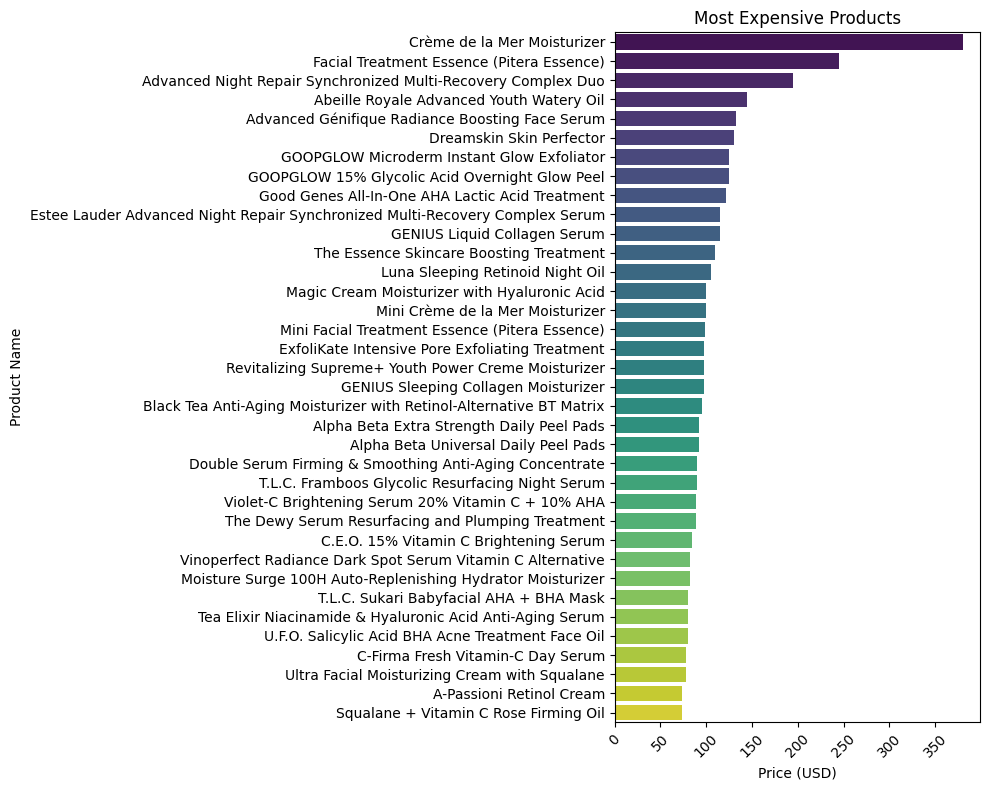

In [39]:
# Sort the dataframe by price in descending order
df_sorted = Reviews250.sort_values(by='price_usd', ascending=False)

# Select the top 20 most expensive products for clarity in visualization
top_n = 80000
df_top_products = df_sorted.head(top_n)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='price_usd', y='product_name', data=df_top_products, palette='viridis')

plt.title('Most Expensive Products')
plt.xlabel('Price (USD)')
plt.ylabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
df_top_products

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,text_length,tokenized,filtered
536713,536713,5223582803,5,NaN,1.000000,1,0,1,2017-02-27,My skin was so dry and sometimes got irritated...,...,NaN,NaN,NaN,P416341,Crème de la Mer Moisturizer,La Mer,380.0,503,"[My, skin, was, so, dry, and, sometimes, got, ...","[skin, dry, sometimes, got, irritated, whole, ..."
535798,535798,1338936585,4,1.0,NaN,0,0,0,2021-05-17,Incredibly hydrating moisturizer that is such ...,...,brown,combination,brown,P416341,Crème de la Mer Moisturizer,La Mer,380.0,261,"[Incredibly, hydrating, moisturizer, that, is,...","[incredibly, hydrating, moisturizer, treat, us..."
535790,535790,27498501825,5,1.0,0.000000,1,1,0,2021-05-17,I was gifted by La Mer. This is a wonderful cr...,...,green,normal,black,P416341,Crème de la Mer Moisturizer,La Mer,380.0,331,"[I, was, gifted, by, La, Mer, ., This, is, a, ...","[gifted, la, mer, wonderful, cream, great, job..."
535791,535791,5202614133,5,1.0,0.000000,1,1,0,2021-05-17,I was gifted by La Mer. Creme de la mer has a ...,...,brown,combination,brown,P416341,Crème de la Mer Moisturizer,La Mer,380.0,425,"[I, was, gifted, by, La, Mer, ., Creme, de, la...","[gifted, la, mer, creme, de, la, mer, great, c..."
535792,535792,2821949959,3,0.0,1.000000,1,0,1,2021-05-17,I got this free from La Mer for review purpose...,...,hazel,normal,brown,P416341,Crème de la Mer Moisturizer,La Mer,380.0,339,"[I, got, this, free, from, La, Mer, for, revie...","[got, free, la, mer, review, purposes, try, go..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535959,535959,1389184045,5,1.0,0.777778,18,4,14,2020-11-04,"LOVE THIS PRODUCT!!! It’s very expensive, inde...",...,blue,normal,blonde,P416341,Crème de la Mer Moisturizer,La Mer,380.0,377,"[LOVE, THIS, PRODUCT, !, !, !, It, ’, s, very,...","[love, product, expensive, indeed, amazing, pr..."
535958,535958,1632690216,5,1.0,0.468750,32,17,15,2020-11-07,"Love this product! I don’t know what it is, bu...",...,blue,dry,blonde,P416341,Crème de la Mer Moisturizer,La Mer,380.0,705,"[Love, this, product, !, I, don, ’, t, know, w...","[love, product, know, something, right, tried,..."
535941,535941,5527244966,5,1.0,0.875000,8,1,7,2020-12-28,Incredible. I can’t say enough about this prod...,...,brown,combination,brown,P416341,Crème de la Mer Moisturizer,La Mer,380.0,431,"[Incredible, ., I, can, ’, t, say, enough, abo...","[incredible, say, enough, product, price, stee..."
535942,535942,11697899427,2,0.0,0.722222,18,5,13,2020-12-24,"Moisturizes fine, however, the scent is overpo...",...,Grey,combination,black,P416341,Crème de la Mer Moisturizer,La Mer,380.0,142,"[Moisturizes, fine, ,, however, ,, the, scent,...","[moisturizes, fine, however, scent, overpoweri..."


/var/folders/tl/40517jl91c37d_b8j15w_1wm0000gn/T/ipykernel_11268/1973298274.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_usd', y='product_name', data=df_top_products, palette='viridis')


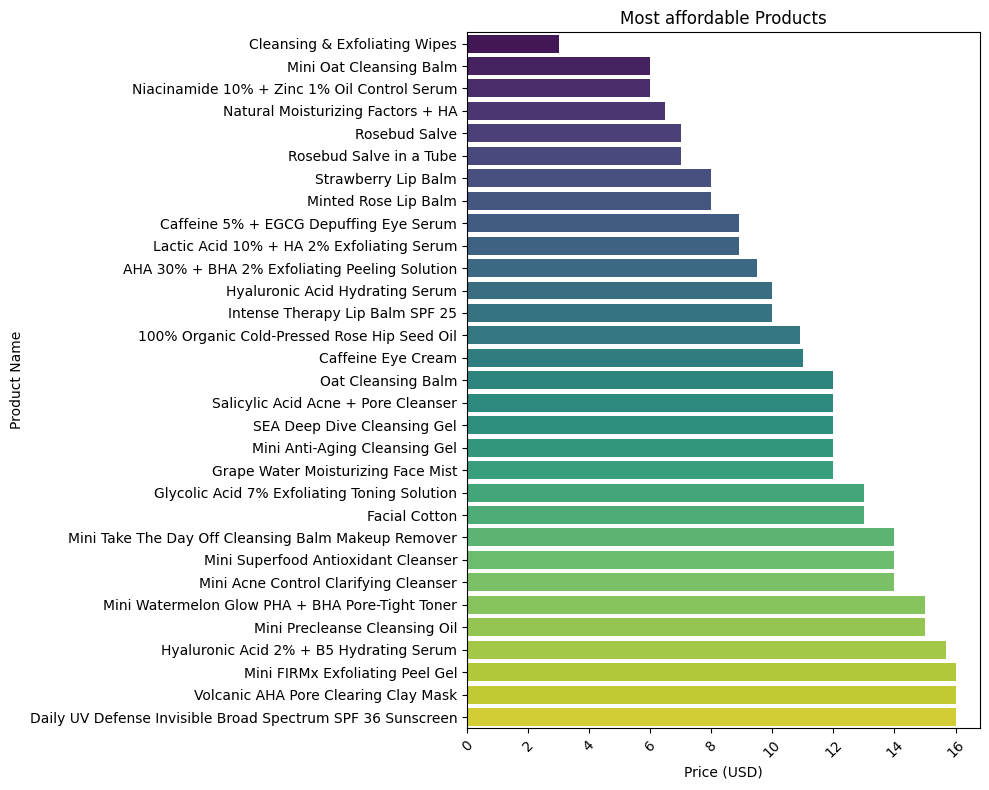

In [40]:
# Sort the dataframe by price in ascending order
df_sorted = Reviews250.sort_values(by='price_usd', ascending=True)

# Select the top 20 most expensive products for clarity in visualization
top_n = 80000
df_top_products = df_sorted.head(top_n)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='price_usd', y='product_name', data=df_top_products, palette='viridis')

plt.title('Most affordable Products')
plt.xlabel('Price (USD)')
plt.ylabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()